In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
!pip install missingno
import missingno as msno
import string
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import f_oneway


%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# to check the working directory
os.getcwd()

'C:\\Users\\wajiz.pk\\Desktop\\BI FINALLL'

In [3]:
df = pd.read_csv('BankChurners.csv')
print(df.shape)
print(df.columns)

(10127, 23)
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [4]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

As can be observed, numerous columns' datatypes are logically erroneous, permitting invalid values and resulting in inconsistent data. To improve data accuracy, they must be fixed and incorrect values eliminated.

In [5]:
def count(df):
    empty_strings = df.astype(str).apply(lambda x: x.str.strip() == '').sum()
    return empty_strings
count(df)

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [8]:
df['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

In [6]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [9]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [10]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [11]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [7]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [12]:
#Unknown strings are replaced with null values so can be handled later.
df = df.replace('Unknown', np.nan)

In [13]:
df.isna().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category            

MISSING VALUES HANDLING

<AxesSubplot:>

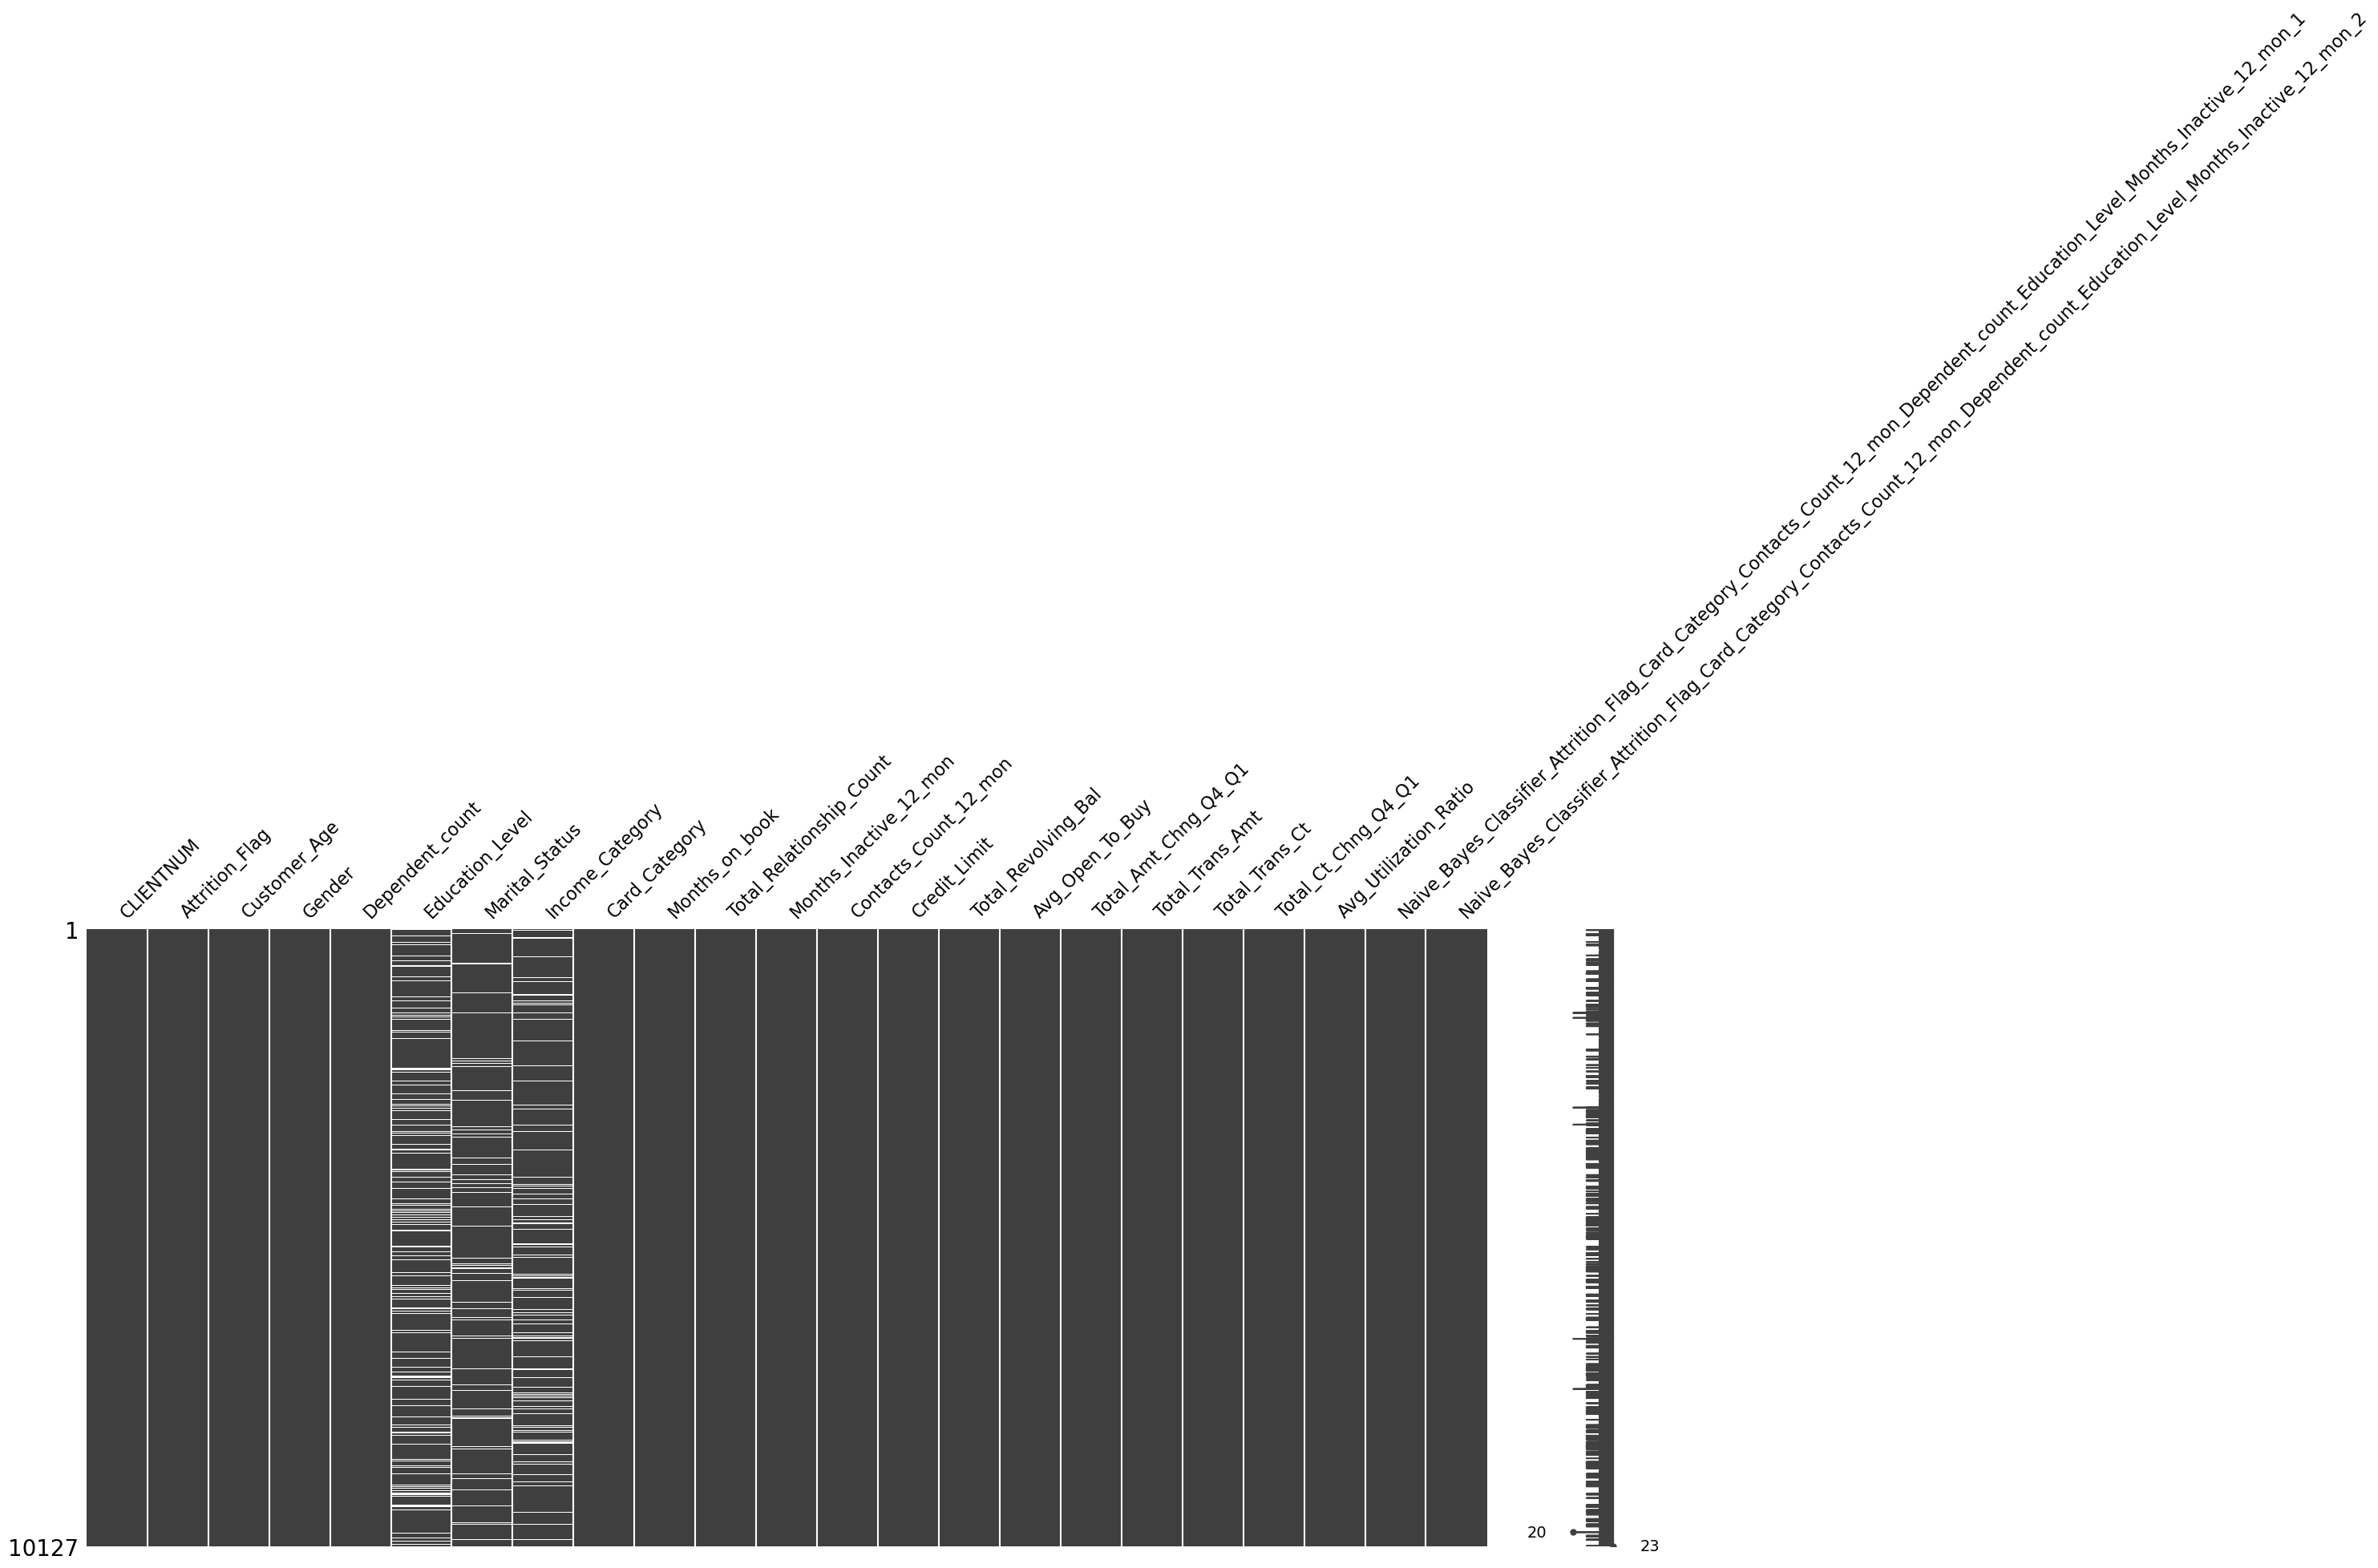

In [14]:
msno.matrix(df)

<AxesSubplot:>

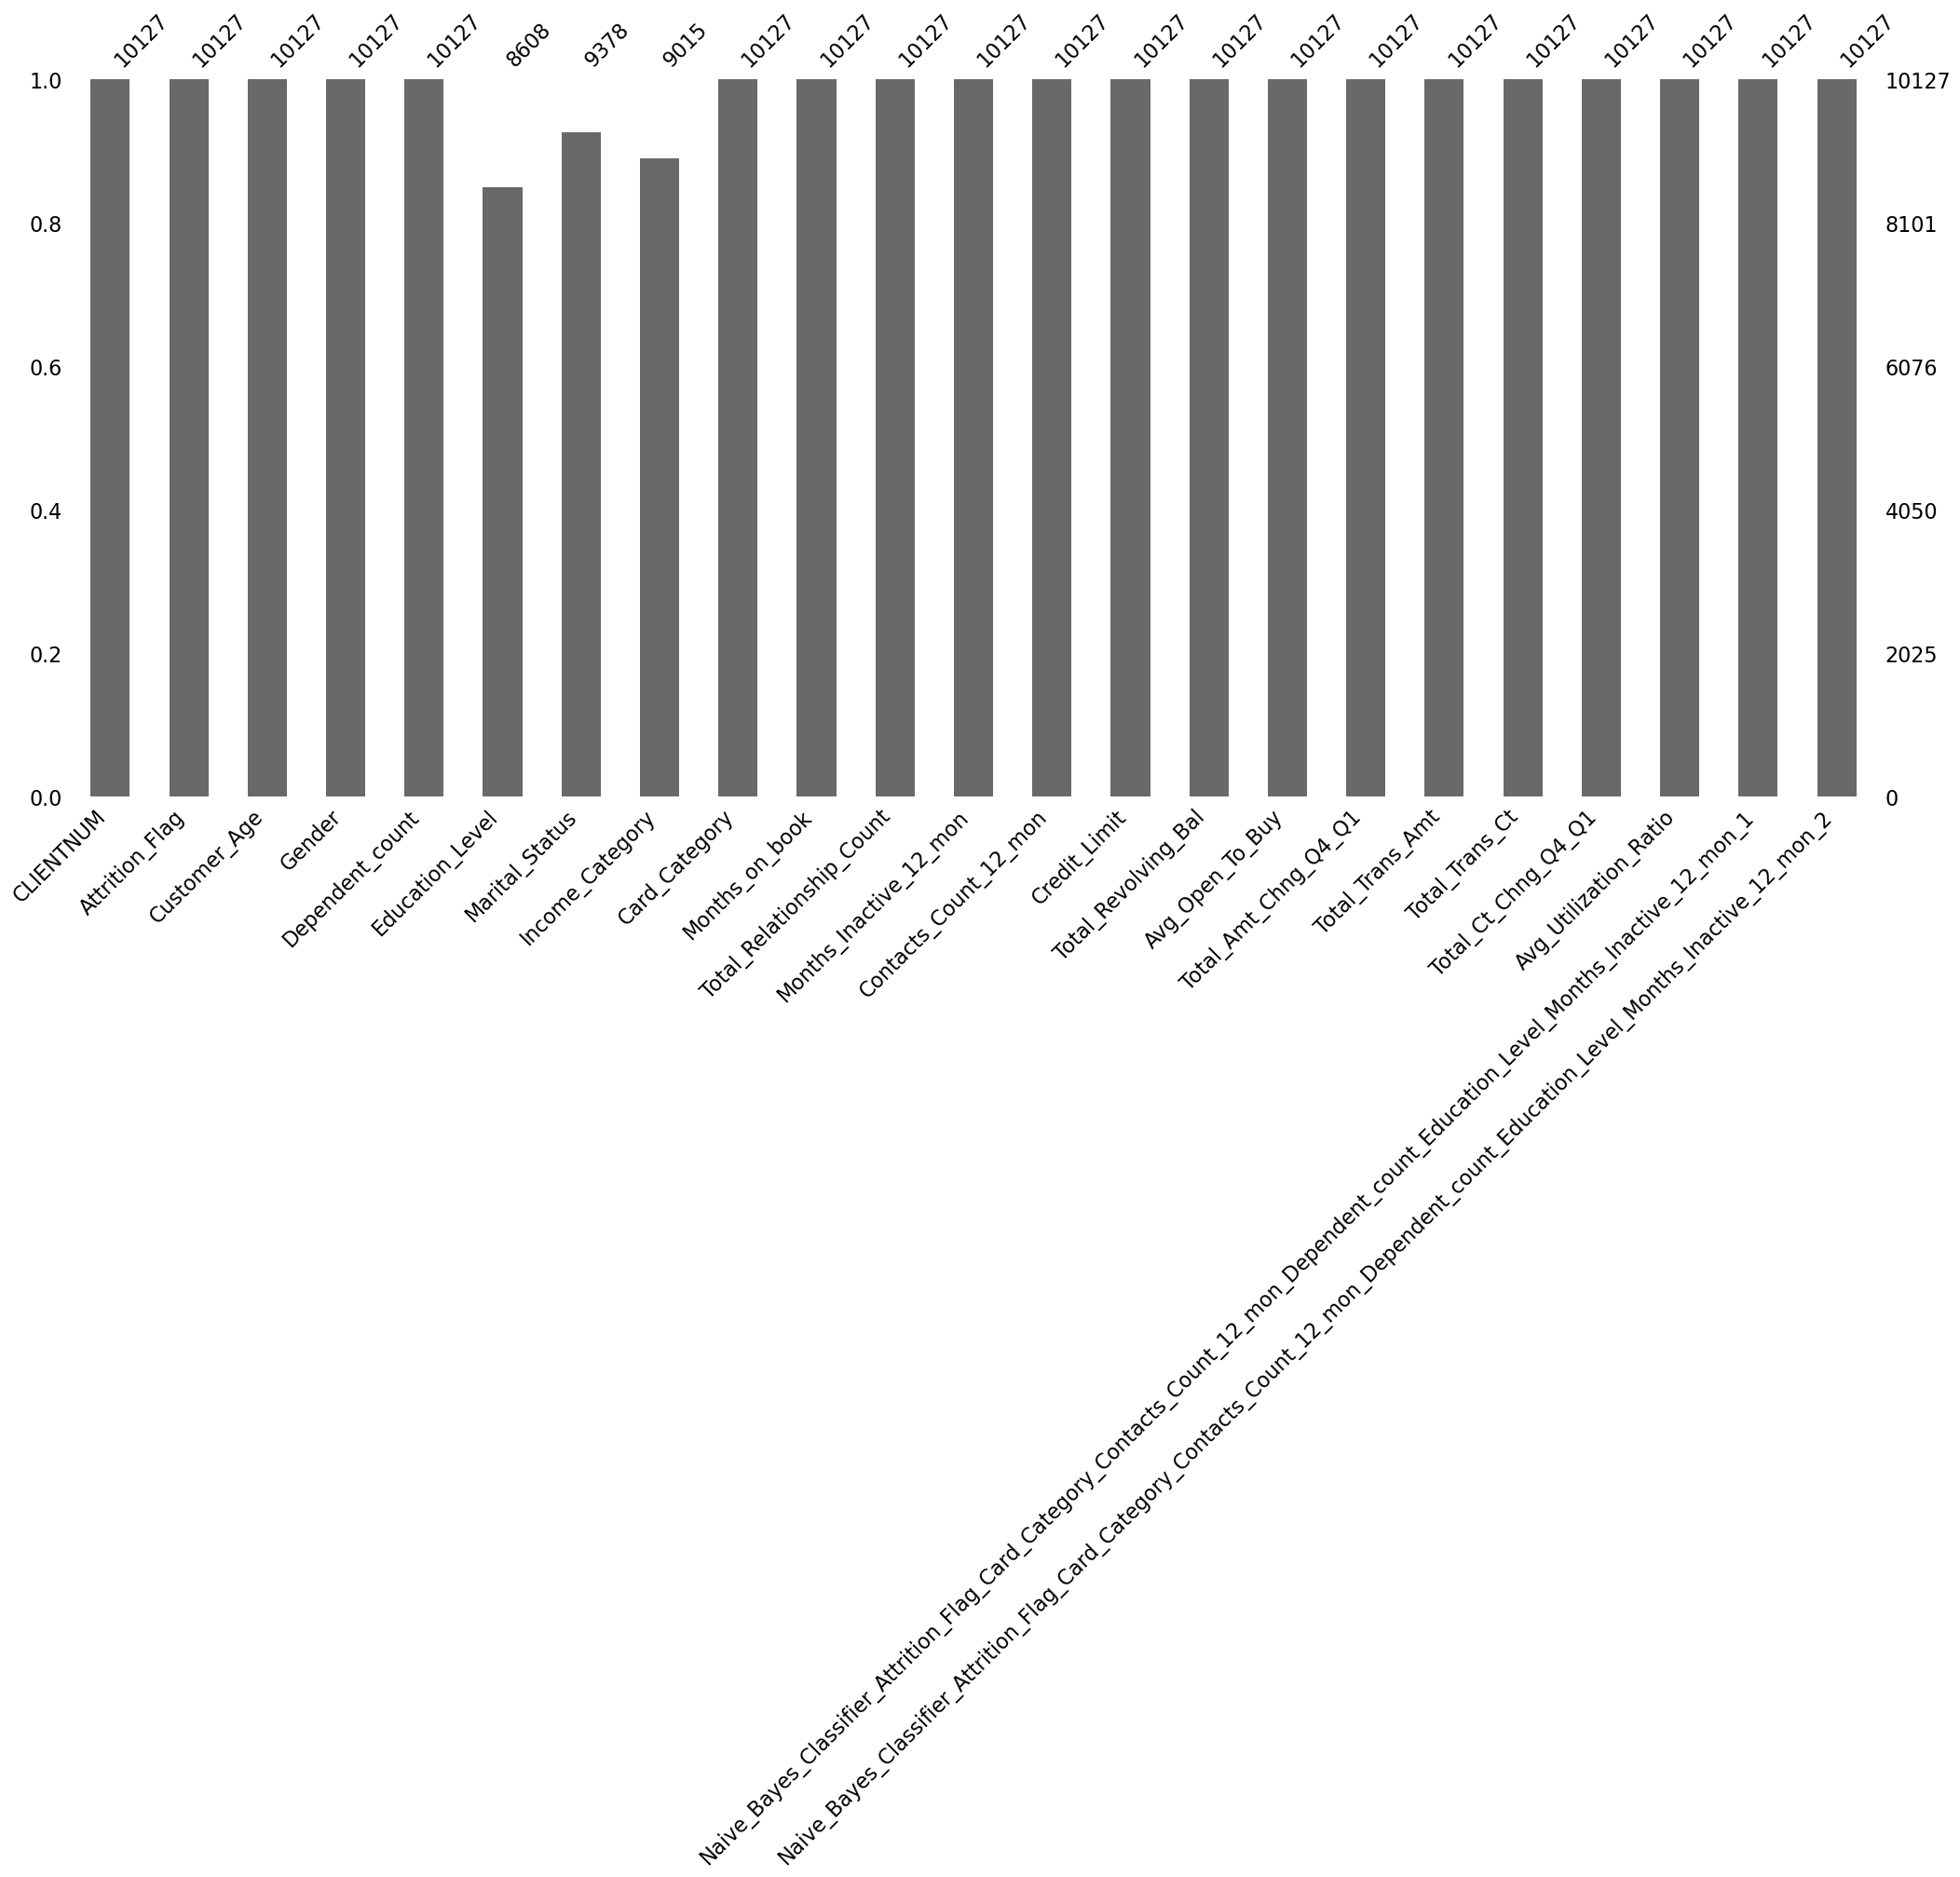

In [15]:
msno.bar(df)

In [16]:
df['Education_Level'].describe()

count         8608
unique           6
top       Graduate
freq          3128
Name: Education_Level, dtype: object

In [17]:
print(df['Education_Level'].value_counts())

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


In [18]:
#imputing with the mode value in the column

df['Education_Level'].fillna("Graduate", inplace=True)

In [19]:
df.isna().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                          0
Marital_Status                                                                                                                         749
Income_Category            

In [20]:
print(df['Marital_Status'].value_counts())

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64


In [23]:
df['Marital_Status'].fillna("Married", inplace=True)

In [24]:
df.isna().sum()

CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                          0
Marital_Status                                                                                                                           0
Income_Category            

In [25]:
def knn(df, vars_to_impute, n_neighbors):
    missingdf_knn = df.copy(deep=True)
    
    imputer = KNNImputer(n_neighbors=n_neighbors)
    missingdf_knn[vars_to_impute] = imputer.fit_transform(missingdf_knn[vars_to_impute])

    return missingdf_knn

In [29]:
# fill missing values with the mode after grouping it with other column

df['Income_Category'].fillna(df.groupby(['Card_Category'])['Income_Category'].transform(lambda x: x.mode()[0]), inplace=True)

In [30]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

<AxesSubplot:>

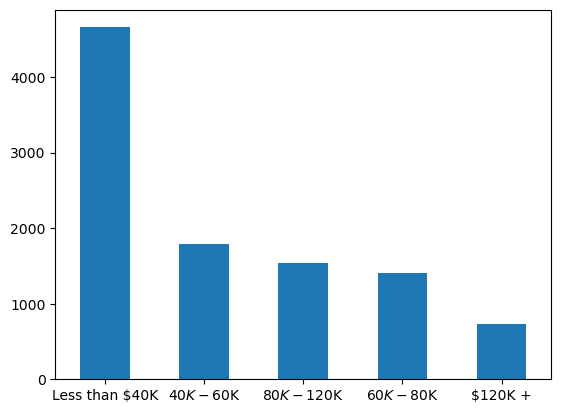

In [31]:
df['Income_Category'].value_counts().plot.bar(rot=0)

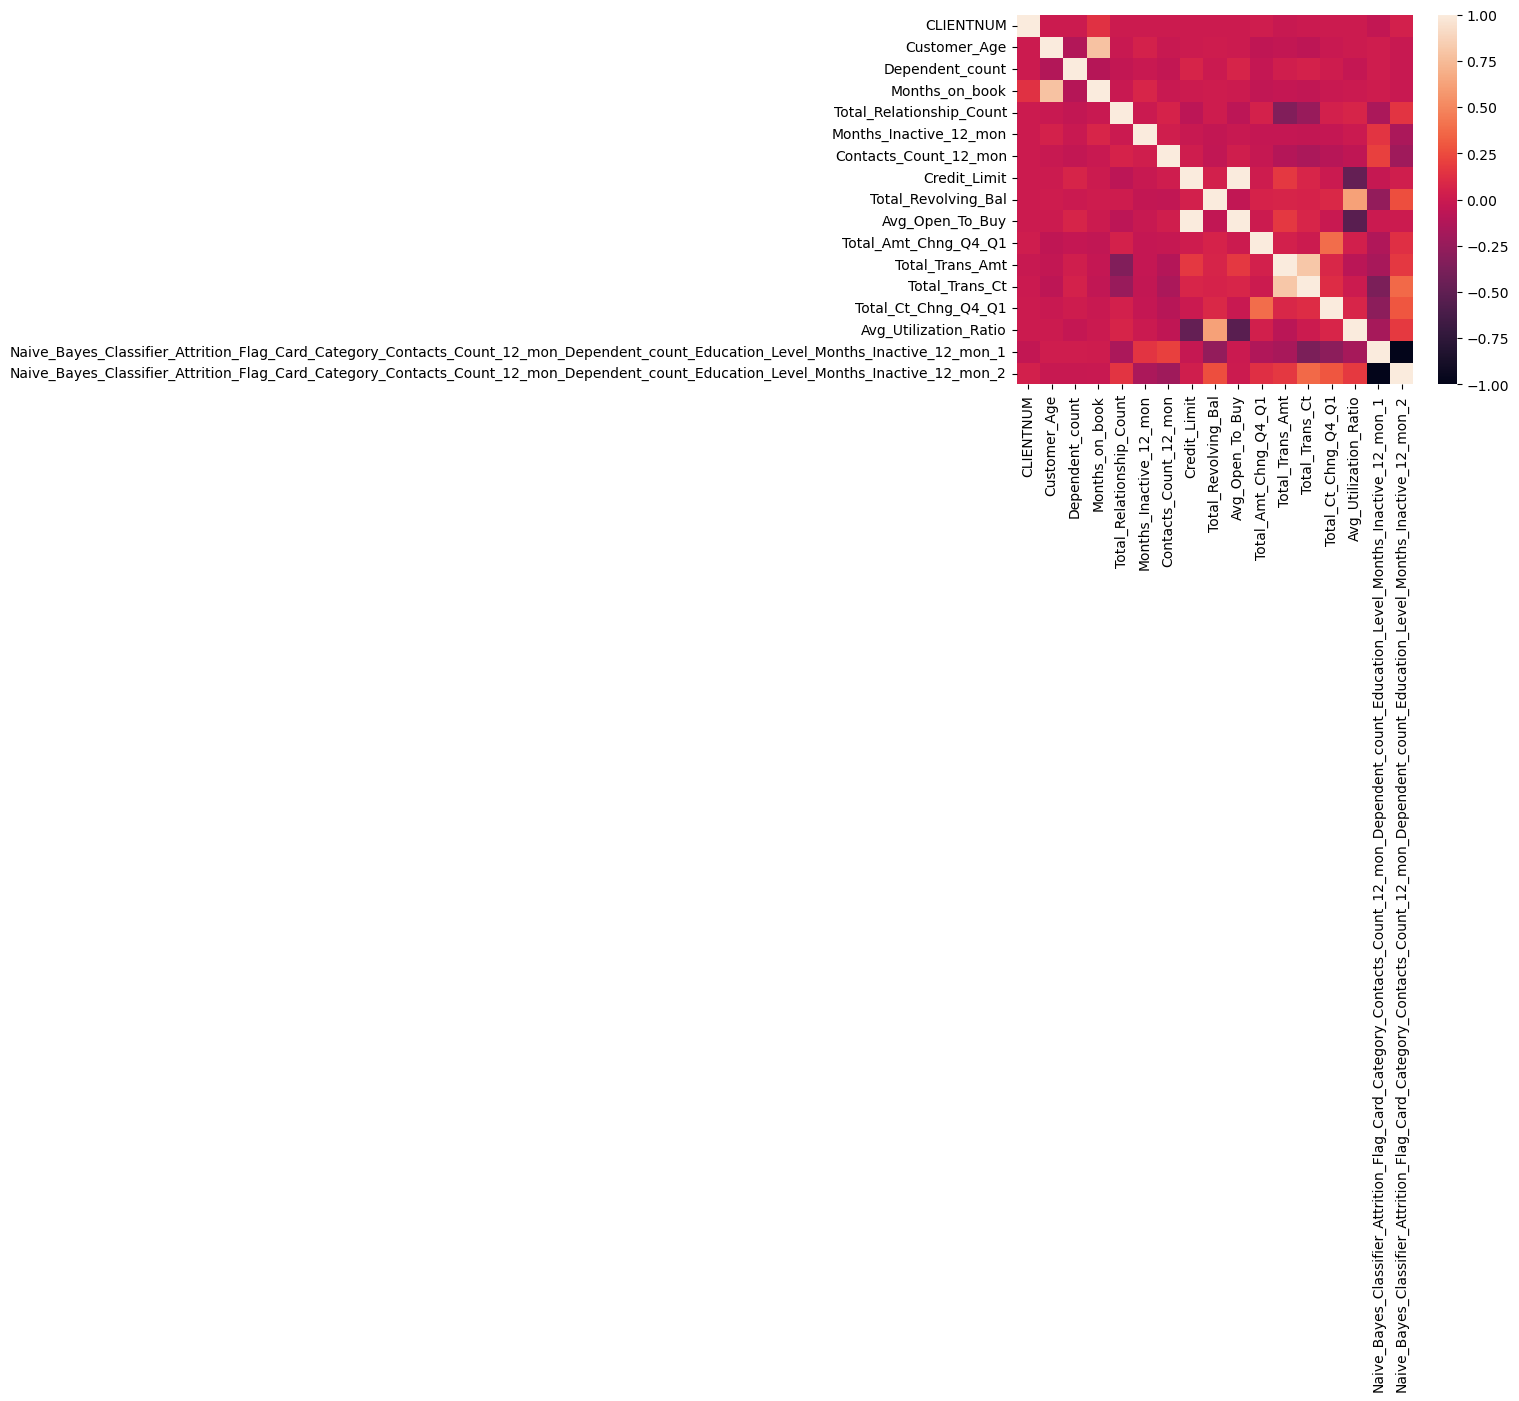

In [32]:
sns.heatmap(df.corr());

In [34]:
with pd.ExcelWriter('KHANSA JUNAID_23074_SUMAIR KHANANI_22995_CLEANDATA.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)